In [1]:
from mmseg.apis import init_model, inference_model
from mmseg.utils import register_all_modules
from mmseg.visualization import SegLocalVisualizer
import mmcv
import mmengine

In [2]:
img_path = "test.jpg"
cfg = mmengine.Config.fromfile("config.py")

In [3]:
model = init_model(
    config="config.py",
    checkpoint="work_dir/epoch_50.pth"
)

/home/zhy/mmlab_hub/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/zhy/mmlab_hub/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: work_dir/epoch_50.pth


In [4]:
register_all_modules()
output = inference_model(model, img_path)

In [5]:
visualizer = SegLocalVisualizer()
visualizer.dataset_meta = dict(
    classes=cfg.metainfo["classes"],
    palette=cfg.metainfo["palette"]
)

06/14 07:27:06 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


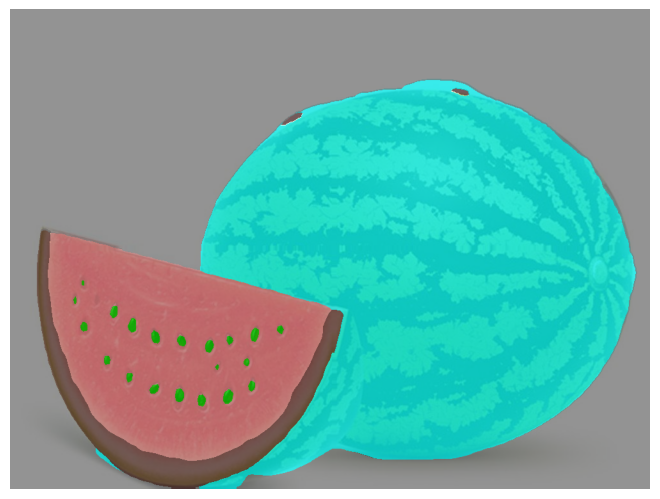

In [6]:
img = mmcv.imread(img_path, channel_order='rgb')

img_output = visualizer.add_datasample(
    "result",
    img,
    data_sample=output,
    draw_gt=False,
    # draw_heatmap=False,
    # draw_bbox=True,
    # show=False,
    # show_kpt_idx=True,
    # wait_time=0,
    # kpt_thr=.3,
    # show=True
)

visualizer.show()